In [1]:
import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
import warnings


In [2]:
def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    print ('正确率：%.2f%%' % (100*float(acc.sum()) / a.size))

In [3]:
def show_recall(y, y_hat):
    print(
        'recall: %.2f%%' %
        (100 * float(np.sum(y_hat[y == 1] == 1)) / np.extract(y == 1, y).size))

In [4]:
c1 = 990
c2 = 10
N = c1 + c2
x_c1 = 3*np.random.randn(c1, 2)
x_c2 = 0.5*np.random.randn(c2, 2) + (4, 4)

In [5]:
x=np.vstack((x_c1,x_c2))
y=np.ones(N)
y[:c1]=-1
s = np.ones(N) * 30
s[:c1] = 10

In [6]:
    clfs = [svm.SVC(C=1, kernel='linear'),
           svm.SVC(C=1, kernel='linear', class_weight={-1: 1, 1: 10}),
           svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 2}),
           svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 10})]
    titles = 'Linear', 'Linear, Weight=50', 'RBF, Weight=2', 'RBF, Weight=10'

In [7]:
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)

In [8]:
cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])

1 次：
正确率：	 0.99
 精度 ：	 0.0
召回率：	 0.0
F1Score：	 0.0


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2 次：
正确率：	 0.968
 精度 ：	 0.225
召回率：	 0.9
F1Score：	 0.36
3 次：
正确率：	 0.994
 精度 ：	 0.7
召回率：	 0.7
F1Score：	 0.7
4 次：
正确率：	 0.986
 精度 ：	 0.409090909091
召回率：	 0.9
F1Score：	 0.5625


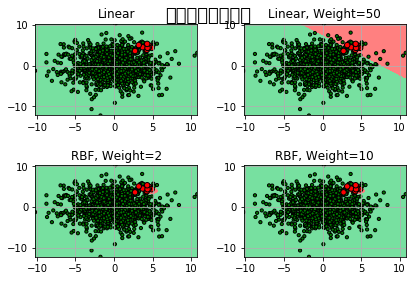

In [11]:
for i, clf in enumerate(clfs):
    clf.fit(x, y)

    y_hat = clf.predict(x)
    plt.subplot(2, 2, i+1)
    grid_hat = clf.predict(grid_test)       # 预测分类值
    grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=s, cmap=cm_dark)      # 样本的显示
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(titles[i])
    plt.grid()
    
    print (i+1, '次：')
    print ('正确率：\t', accuracy_score(y, y_hat))
    print (' 精度 ：\t', precision_score(y, y_hat, pos_label=1))
    print ('召回率：\t', recall_score(y, y_hat, pos_label=1))
    print ('F1Score：\t', f1_score(y, y_hat, pos_label=1))
    
    
plt.suptitle(u'不平衡数据的处理', fontsize=18)
plt.tight_layout(1.5)
plt.subplots_adjust(top=0.92)
plt.show()

In [29]:
range(5)

range(0, 5)

In [32]:
a=range(10)
b=np.arange(11,21)
np.vstack((a,b))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])

In [33]:
np.hstack((a,b))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])